<a href="https://colab.research.google.com/github/rifki2997/Purwadhika_AirBnB_Bangkok/blob/main/PurwadhikaAirBnBBangkok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Latar Belakang**

Airbnb adalah salah satu perusahaan yang menggambarkan kisah sukses yang luar biasa dalam dunia perjalanan dan ekonomi berbagi. Perjalanan perusahaan ini dimulai pada tahun 2008, ketika dua pendiri Airbnb, Brian Chesky dan Joe Gebbia, membuka pintu apartemen mereka di San Francisco untuk menyambut tiga tamu yang mencari tempat menginap sementara. Ide sederhana ini menjadi batu loncatan untuk perubahan besar dalam industri perjalanan.

Pada awalnya, Airbnb adalah inovasi yang sangat sederhana, di mana tuan rumah dapat menyewakan sebagian ruang di rumah mereka kepada para tamu yang mencari akomodasi yang lebih pribadi dan terjangkau daripada hotel konvensional. Airbnb memberikan platform online yang memungkinkan tuan rumah untuk memasarkan properti mereka dan memungkinkan pelancong untuk menemukan akomodasi yang unik dan beragam.

Sejak saat itu, Airbnb telah mengalami pertumbuhan luar biasa. Dari awalnya hanya satu kasur udara di lantai apartemen, Airbnb telah berkembang menjadi platform global dengan lebih dari 6 juta daftar akomodasi di lebih dari 191 negara di seluruh dunia. Airbnb telah mengubah cara orang bepergian dan mencari tempat tinggal sementara, menghubungkan jutaan tuan rumah dengan jutaan tamu, dan membantu menciptakan ekonomi berbagi yang kuat.

Kunci keberhasilan Airbnb adalah kemampuannya untuk mengikuti tren perjalanan global yang berubah, di mana konsumen semakin mencari pengalaman perjalanan yang lebih pribadi, terjangkau, dan autentik. Airbnb juga telah memungkinkan jutaan orang untuk menghasilkan pendapatan tambahan dengan menyewakan properti mereka, yang pada gilirannya telah mendukung pertumbuhan ekonomi lokal.

Dalam perjalanan suksesnya, Airbnb juga telah menghadapi berbagai tantangan, termasuk masalah regulasi dan perbedaan pendapat dengan pemerintah dan industri hotel tradisional. Namun, Airbnb terus berinovasi, berkolaborasi dengan pemerintah, dan menyediakan berbagai jenis akomodasi, termasuk rumah, apartemen, kastil, dan bahkan rumah pohon.

Airbnb tidak hanya menjadi salah satu perusahaan terbesar dalam industri perjalanan, tetapi juga ikut serta dalam perubahan fundamental dalam cara kita bepergian, menginap, dan berbagi. Kesuksesannya mencerminkan daya tarik ekonomi berbagi dan keinginan konsumen untuk pengalaman perjalanan yang lebih personal. Airbnb terus menjadi pemimpin dalam ekonomi berbagi dan terus berupaya untuk menghadirkan perjalanan yang memenuhi kebutuhan komunitas di seluruh dunia.   


# **Pernyataan Masalah**
Perusahaan AirBnB ingin mengetahui faktor apa saja yang mempengaruhi customer ketika memilih penginapan di kota Bangkok, Thailand.

Sebagai seorang data analyst, saya akan mencoba menjawab pertanyaan berikut:

**Mengidentifikasi karakteristik customer yang menyewa penginapan di Bangkok**


# **Data**

In [6229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait deskripsi dan kondisi _listing_ / pendaftaran ruangan yang akan disewakan. Ada 17 kolom di dalam dataset 'Airbnb Listings Bangkok', yaitu:  

* Unnamed: 0	                    : Berisi indeks dari dataset 
* id                                : ID unik untuk setiap _listing_ yang disewakan
* name                              : Derkripsi nama dari setiap _listing_/pendaftaran ruangan yang disewakan
* host_id                           : ID unik/berbeda untuk setiap _host_ 
* host_name                         : Nama dari setiap _host_, khususnya hanya nama diawal
* neighbourhood                     : _Neighbourhood_ adalah nama distrik yang berada  di ibu kota Bangkok
* latitude                          : Titik pada garis Lintang untuk proyeksi lokasi
* longitude                         : Titik pada garis Bujur untuk proyeksi lokasi
* room_type                         : Tipe dari ruangan yang disewakan _entire home/apt_, _private room_,   _share room_, dan _hotel_
* price                             : Harga kamar perhari dalam mata uang Bath (Thailand)
* minimum_nights                    : Jumlah minimum masa inap untuk tempat tersebut
* number_of_reviews                 : Jumlah ulasan yang dimiliki setiap _listing_
* last_review                       : Tanggal ulasan terbaru
* reviews_per_month                 : Rata-rata jumlah reviews per bulan
* calculated_host_listings_count    : Jumlah listing yang dimiliki oleh host
* availability_365                  : Ketersediaan listing dalam 1 tahun kedepan
* number_of_reviews_ltm             : Jumlah ulasan yang dimiliki setiap _listing_ (dalam 12 bulan terakhir).


Berikut 5 baris teratas dan terbawah dari dataset 'Airbnb Listings Bangkok'.

In [6230]:
df=pd.read_csv('Airbnb Listings Bangkok.csv')
display(df.head(),df.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


In [6231]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(15854, 17)


,dataFeatures,dataType,null,unique,uniqueSample
0,Unnamed: 0,int64,0,15854,"[11193, 13733]"
1,id,int64,0,15854,"[744623183236976189, 20689364]"
2,name,object,8,14794,"[Skywalk Residence-Sukhumvit, 【曼谷小东京2间卧室豪华公寓】步行可达网红餐饮、日本堂吉诃德等]"
3,host_id,int64,0,6659,"[252076709, 46607005]"
4,host_name,object,1,5312,"[Sinra, Peeda]"
5,neighbourhood,object,0,50,"[Bang Bon, Chom Thong]"
6,latitude,float64,0,9606,"[13.77685, 13.71237]"
7,longitude,float64,0,10224,"[100.57103, 100.60783]"
8,room_type,object,0,4,"[Hotel room, Shared room]"
9,price,int64,0,3040,"[2590, 5783]"


## Data Understanding and Cleaning
Sebelum menganalisis data, sebagai data analyst, saya perlu mengenal dataset atau masuk ke tahapan *data understanding*. Dari proses ini, kita mendapati anomali-anomali apa saja yang terdapat di dalam dataset yang disediakan dan perlu ditangani dalam tahapan *data cleaning*. Setiap penanganan anomali yang dilakukan, akan disertai dengan penjelasan langkah yang diambil.


In [6232]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (15854, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854

In [6233]:
display(df.describe(), df.describe(include='object'))

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [6234]:
pd.set_option('display.max_colwidth', 0)
df_unique=pd.DataFrame(df.nunique()).reset_index().rename(columns={'index':'Column Name',0:'Number of Unique'})
df_unique['Unique Values']=[df[i].unique() for i in df]
display(df_unique,f'Data Duplikat = {df.duplicated().sum()}')

,Column Name,Number of Unique,Unique Values
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
2,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel roo

'Data Duplikat = 0'

In [6235]:
# Ubah nama kolom id dan name menjadi listing_id dan listing_name
df.rename(columns={'id': 'listing_id','name':'listing_name'}, inplace=True)

In [6236]:
pd.set_option('display.max_colwidth', 1)
# data uni di tiap kolom
list1 = []
for col in df.columns :
    list1.append( [col, df[col].nunique(), df[col].unique()])

tabel1 = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=list1)
tabel1

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,listing_id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
2,listing_name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Su

Secara umum, kita bisa melihat bahwa:
* dataset AirBnB listings Bangkok memiliki 16 kolom dan 15.854 baris
* beberapa kolom, yaitu, `listing_name`, `last_review`,dan `reviews_per_month` memiliki data kosong.  Data di `last_review`,dan `reviews_per_month` memiliki NaN.
* kolom `latitude` dan `longtitude` berisikan untuk menentukan titik lokasi 
* kolom  `host_id` berisikan id unik untuk tiap host, sehingga tidak relevan dalam analisis dan bisa dihapus saja. Sedangkan `host_name` juga dihapus dikarenakan tidak ada hubungan dengan penelitian ini.
* kolom `name` memiliki data tipe object serta memiliki karakter yang unik sehingga perlu diganti.
* kolom `availability_365` memiliki data 0 yang artinya tempat tersebut sering penuh.

## Missing Value

In [6237]:
# Jumlah missing value di tiap kolom
df.isna().sum()

Unnamed: 0                        0   
listing_id                        0   
listing_name                      8   
host_id                           0   
host_name                         1   
neighbourhood                     0   
latitude                          0   
longitude                         0   
room_type                         0   
price                             0   
minimum_nights                    0   
number_of_reviews                 0   
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count    0   
availability_365                  0   
number_of_reviews_ltm             0   
dtype: int64

In [6238]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Unnamed: 0                        0.000000 
listing_id                        0.000000 
listing_name                      0.050460 
host_id                           0.000000 
host_name                         0.006308 
neighbourhood                     0.000000 
latitude                          0.000000 
longitude                         0.000000 
room_type                         0.000000 
price                             0.000000 
minimum_nights                    0.000000 
number_of_reviews                 0.000000 
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count    0.000000 
availability_365                  0.000000 
number_of_reviews_ltm             0.000000 
dtype: float64

In [6239]:
#Pengecekan Data Kosong, dan ditemukan sebanyak 5973 row kosong dikolom name, host_name, last_review dan reviews_month

print(len(df[df.isna().any(axis=1)]))
df[df.isna().any(axis=1)]

5793


,Unnamed: 0,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


<Axes: >

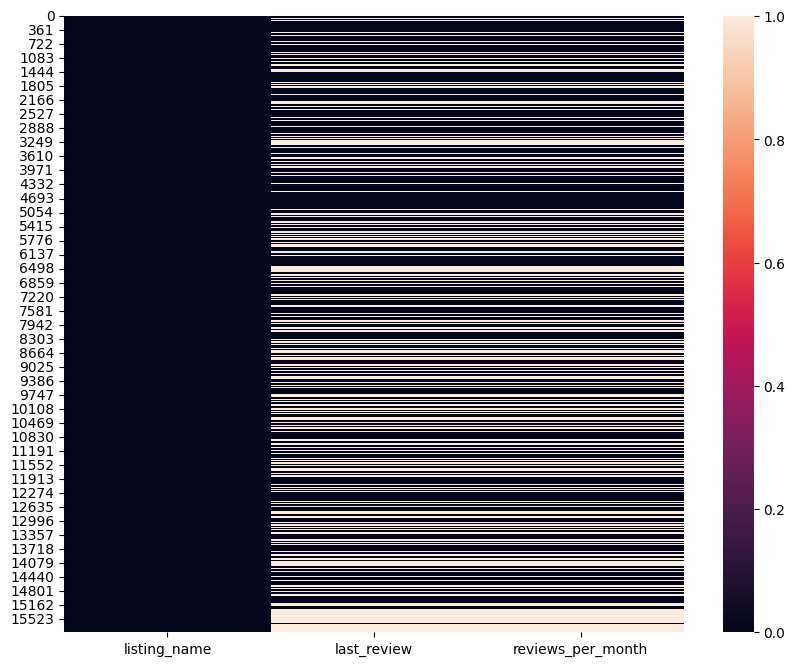

In [6240]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['listing_name', 'last_review', 'reviews_per_month']].isna())

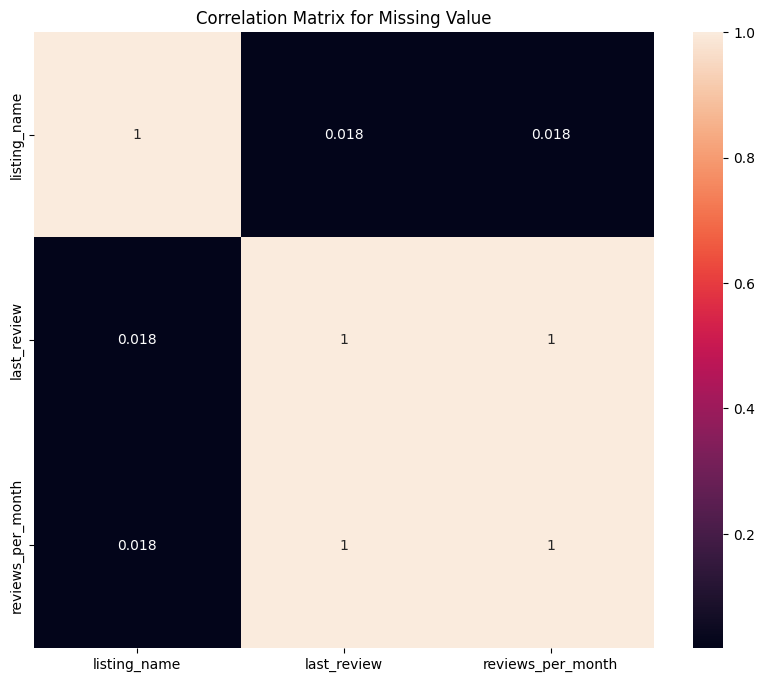

In [6241]:
correlation_matrix1 = df[['listing_name', 'last_review', 'reviews_per_month']].isna().corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True)
plt.title('Correlation Matrix for Missing Value')
plt.show()

Secara garis besar:  
* *missing value* di kolom `last_review`,dan `reviews_per_month` memiliki proporsi yang cukup tinggi mencapai 36.52%.
* *missing value* di kolom `name` memiliki porsi sedikit yaitu sekitar 0.05 %
* *missing value* di kolom `last_review`,dan `reviews_per_month` memiliki korelasi data.


Ada 2 cara untuk menangani *missing value*:
* pertama, menghapus baris yang berisi *missing value*. Cara ini tidak disarankan dalam kasus kita, karena jumlah missing value yang tergolong cukup tinggi (sampai 36%).
* kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.

Ketika sudah mendapat gambaran anomali dari data diatas, untuk tahap selanjutnya, saya ingin melihat dan menganalisa setiap anomali secara lebih jauh.

Karena jumlah missing value pada kolom name hanya berjumlah 0.05% dari total seluruh data dan tidak ada referensi untuk hal tersebut maka tidak ada masalah untuk menghapus baris yang terdapat missing value pada kolom name

In [6242]:
# Mengecek missing value yang terdapat pada kolom name
df['listing_name'].isna().sum()

8

Dikarenakan adanya NaN value di 'name' kolom menyebabkan error ketika menggunakan metode dropna(). oleh karena itu, saya menggunakn notna() metode untuk membuat topeng boolean supaya filter kolom yang tidak missing value di 'name' kolom.

In [6243]:
# Melihat jumlah review per month 
df['reviews_per_month'].value_counts()

reviews_per_month
0.02     498
0.03     467
1.00     304
0.05     248
0.04     223
        ... 
6.70     1  
4.26     1  
6.12     1  
4.57     1  
16.00    1  
Name: count, Length: 513, dtype: int64

In [6244]:
df['reviews_per_month'] = df['reviews_per_month']*100
df['reviews_per_month'].value_counts()

reviews_per_month
2.0       498
3.0       467
100.0     304
5.0       248
4.0       223
         ... 
670.0     1  
426.0     1  
612.0     1  
457.0     1  
1600.0    1  
Name: count, Length: 513, dtype: int64

In [6245]:
df['last_review'].value_counts()

last_review
2022-12-11    189
2022-12-14    184
2022-12-13    179
2022-12-12    172
2022-12-10    142
             ... 
2015-04-05    1  
2017-08-01    1  
2015-01-01    1  
2020-10-12    1  
2022-05-08    1  
Name: count, Length: 1669, dtype: int64

Setelah mengetahui data di `last_review`,dan `reviews_per_month`, dikarenakan `last_review` tidak memiliki korelasi dengan data data yang lain kecuali untuk missing value, maka kolom `last_review` didrop. Setelah menghapus column, jumlah kandidat dengan data kosong di `reviews_per_month` berdasarkan `number_of_reviews` dan `number_of_reviews_ltm`.

In [6246]:
df.drop('last_review', axis=1, inplace=True)
df.head()

,Unnamed: 0,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,50.0,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,3.0,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,3,365,0


In [6247]:
# jumlah kandidat dengan data kosong di 'reviews_per_month' berdasarkan 'number_of_reviews' dan 'number_of_reviews_ltm'
display(df[df['reviews_per_month'].isna()]['number_of_reviews'].value_counts(),
df[df['reviews_per_month'].isna()]['number_of_reviews_ltm'].value_counts())

number_of_reviews
0    5790
Name: count, dtype: int64

number_of_reviews_ltm
0    5790
Name: count, dtype: int64

dari hasil analisa ditemukan adanya 0 di `availability_365` tetapi hal ini menandakan bahwa tempat penginapan penuh, terpecaya, dan sering dipakai oleh turis. dengan pemahaman tersebut, maka kolom `availability_365` akan diisi dengan yes dan no.

In [6248]:
# ubah 'availability_365' dari column ke string
df['availability_365'] = df['availability_365'].astype(str)

# mengganti value dengan kondisi tertentu dan ubah menjadi 'Yes' atau 'No'
# No berarti kamar penuh
df['availability_365'] = np.where(df['availability_365'] < '365', 'Yes', 'No')
df.head()

,Unnamed: 0,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,50.0,2,Yes,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,2,Yes,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,1,No,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,3.0,1,Yes,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,3,No,0


setelah selesai merubah, drop kolom yang tidak dibutuhkan dalam analisa seperti `Unnamed: 0` ,`latitude`, `calculated_host_listings_count`, `number_of_reviews_ltm`, `longitude` dan `host_id`. setelah selesai

In [6249]:
df = df.drop(columns=['Unnamed: 0', 'host_id', 'host_name', 'latitude', 'longitude', 'calculated_host_listings_count', 'reviews_per_month', 'number_of_reviews_ltm'])

### **Handling Missing Value**

In [6250]:
df['listing_name'] = df['listing_name'].fillna('No Name')

In [6251]:
df[df['listing_name'].isna()]

,listing_id,listing_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365


### **Duplicate**

In [6252]:
df.duplicated().sum()


0

 ### **Handling Outliers**

#### Kolom `price`

In [6253]:
df[['price']].describe()

,price
count,1.585400e+04
mean,3.217704e+03
std,2.497212e+04
min,0.000000e+00
25%,9.000000e+02
50%,1.429000e+03
75%,2.429000e+03
max,1.100000e+06


<Axes: xlabel='room_type', ylabel='price'>

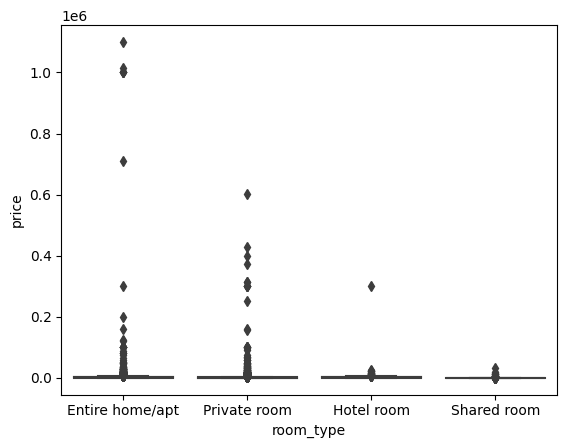

In [6254]:
sns.boxplot(data = df,x='room_type', y='price')

In [6255]:
df[df['price']==0]

,listing_id,listing_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
11103,44563108,Somerset Maison Asoke Bangkok,Vadhana,Hotel room,0,1,0,Yes


In [6256]:
df.loc[11103, 'price'] = df[(df['room_type'] == 'Hotel room') & (df['neighbourhood'] == 'Vadhana')]['price'].median()

In [6257]:
df.loc[[11103]]

,listing_id,listing_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
11103,44563108,Somerset Maison Asoke Bangkok,Vadhana,Hotel room,2414,1,0,Yes


In [6258]:
df.columns

Index(['listing_id', 'listing_name', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'availability_365'],
      dtype='object')

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [6259]:
df.head()

,listing_id,listing_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
0,27934,Nice room with superb city view,Ratchathewi,Entire home/apt,1905,3,65,Yes
1,27979,"Easy going landlord,easy place",Bang Na,Private room,1316,1,0,Yes
2,28745,modern-style apartment in Bangkok,Bang Kapi,Private room,800,60,0,No
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,Din Daeng,Private room,1286,7,2,Yes
4,941865,Suite Room 3 at MetroPoint,Bang Kapi,Private room,1905,1,0,No


In [6260]:
df.isna().sum()

listing_id           0
listing_name         0
neighbourhood        0
room_type            0
price                0
minimum_nights       0
number_of_reviews    0
availability_365     0
dtype: int64

In [6261]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(15854, 8)


,dataFeatures,dataType,null,unique,uniqueSample
0,listing_id,int64,0,15854,"[35722523, 10133553]"
1,listing_name,object,0,14795,"[- Hyde Sukhumvit 11 - High Floor Super View - NANA, belle两房豪华公寓]"
2,neighbourhood,object,0,50,"[Phra Khanong, Pom Prap Sattru Phai]"
3,room_type,object,0,4,"[Shared room, Hotel room]"
4,price,int64,0,3039,"[4997, 3189]"
5,minimum_nights,int64,0,86,"[3, 150]"
6,number_of_reviews,int64,0,298,"[277, 17]"
7,availability_365,object,0,2,"[No, Yes]"


## Data Analisis
Setelah melakukan tahap _data cleaning_. Sekarang, analis dapat melakukan analisis untuk mencari tahu **Mengidentifikasi karakteristik customer yang menyewa penginapan di Bangkok**

Analisis akan dimulai dengan membandingkan data berdasarkan variabel-variabel yang tersedia. 

## Analisa By `Neighbourhood`,`room_type`,`minimum_nights`,dan `price`  

Pertama, mari melihat bagaimana pengaruh letak atau lokasi para customer. Kita akan menganalisis kolom  `neighbourhood`,`room_type`,`minimum_nights` dan `price` untuk menjawab beberapa pertanyaan. seperti :
1. Bagaimana distribusi harga per unit penginapan di setiap wilayah?
2. Dimana penginapan dengan jumlah minimun night tertinggi?
3. 
4.


In [6262]:
# 10 wilayah berdasarkan price dan minimum_night paling banyak beserta tipe kamar
dfa = df[['neighbourhood','room_type', 'price', 'minimum_nights']]
dfa.sort_values('price',ascending=False).head(10)

,neighbourhood,room_type,price,minimum_nights
12868,Vadhana,Entire home/apt,1100000,14
12300,Vadhana,Entire home/apt,1014758,30
1239,Huai Khwang,Entire home/apt,1000000,100
9345,Khlong Toei,Entire home/apt,1000000,25
6289,Khlong Toei,Entire home/apt,1000000,2
1779,Huai Khwang,Entire home/apt,1000000,100
4620,Huai Khwang,Entire home/apt,1000000,1
15200,Khlong San,Entire home/apt,710760,12
4373,Bang Phlat,Private room,600700,1
11885,Bang Kapi,Private room,429443,1


### Berdasarkan `Neighbourhood`

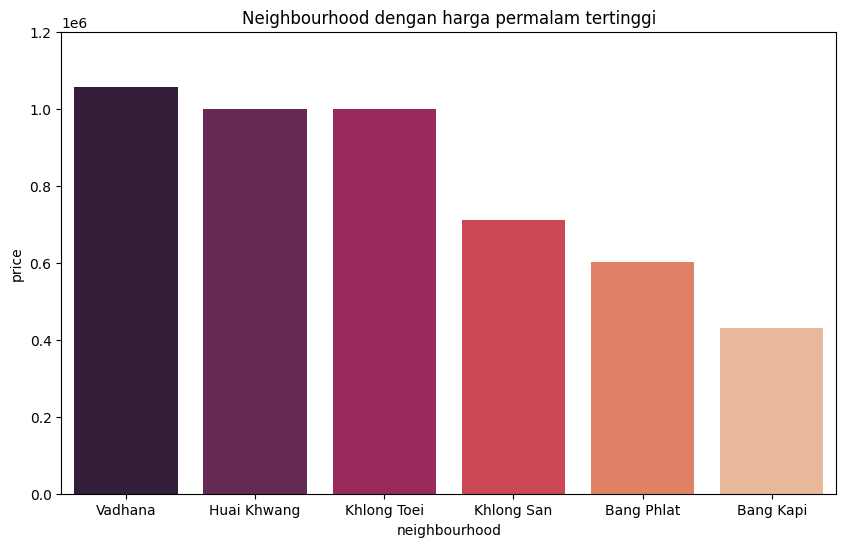

In [6263]:
# Data Visualization
plt.figure(figsize=(10, 6))
dfa_nb = dfa.nlargest(10, 'price')
sns.barplot(data = dfa_nb, x = 'neighbourhood', y = 'price',palette='rocket',ci=0)
plt.title("Neighbourhood dengan harga permalam tertinggi")
plt.xlabel("neighbourhood")
plt.ylabel("price")
y_min = 0
y_max = 1200000
plt.ylim(y_min, y_max)
plt.show()

### Berdasarkan `minumum_nights`

In [6264]:
dfa_mn

,neighbourhood,room_type,price,minimum_nights
61,Parthum Wan,Entire home/apt,2900,1125
7986,Bang Na,Entire home/apt,2000,1115
11524,Bang Sue,Entire home/apt,554,1095
10153,Sathon,Entire home/apt,650,1000
10644,Vadhana,Private room,15143,999
11243,Suanluang,Private room,1314,999
1200,Bang Na,Entire home/apt,35000,998
1592,Chatu Chak,Entire home/apt,760,700
1833,Suanluang,Entire home/apt,1300,500
3694,Vadhana,Entire home/apt,7286,500


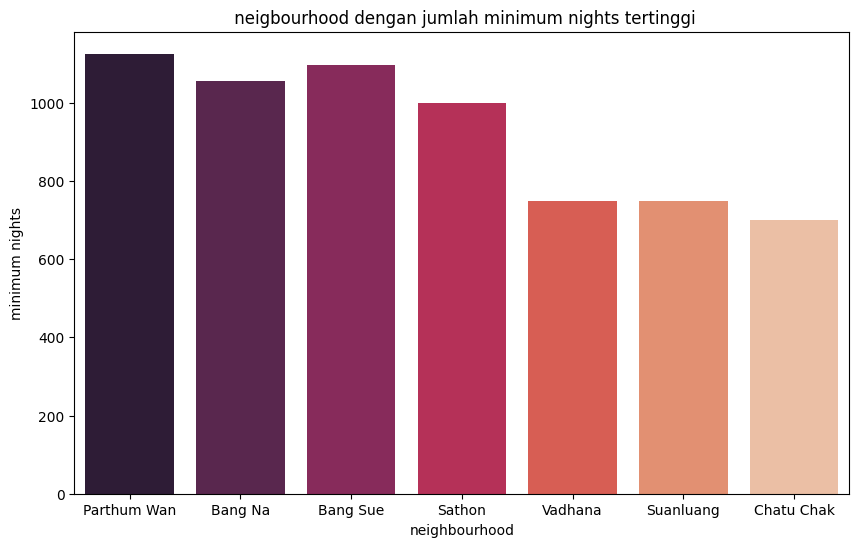

In [6265]:
# Data Visualization
plt.figure(figsize=(10, 6))
dfa_mn = dfa.nlargest(10, 'minimum_nights')
sns.barplot(data = dfa_mn, x = 'neighbourhood', y = 'minimum_nights',palette='rocket', ci = 0)
plt.title(" neigbourhood dengan jumlah minimum nights tertinggi")
plt.xlabel("neighbourhood")
plt.ylabel("minimum nights")
plt.show()

### Berdasarkan `room_type`

In [6266]:
dfa.sort_values('price',ascending=False).head(10)

,neighbourhood,room_type,price,minimum_nights
12868,Vadhana,Entire home/apt,1100000,14
12300,Vadhana,Entire home/apt,1014758,30
1239,Huai Khwang,Entire home/apt,1000000,100
9345,Khlong Toei,Entire home/apt,1000000,25
6289,Khlong Toei,Entire home/apt,1000000,2
1779,Huai Khwang,Entire home/apt,1000000,100
4620,Huai Khwang,Entire home/apt,1000000,1
15200,Khlong San,Entire home/apt,710760,12
4373,Bang Phlat,Private room,600700,1
11885,Bang Kapi,Private room,429443,1


In [6267]:
room_type_med_price = df.groupby('room_type')['price'].median().reset_index().rename(columns={'price':'med_price'})
room_type_med_price

,room_type,med_price
0,Entire home/apt,1536.0
1,Hotel room,1700.0
2,Private room,1212.0
3,Shared room,500.0


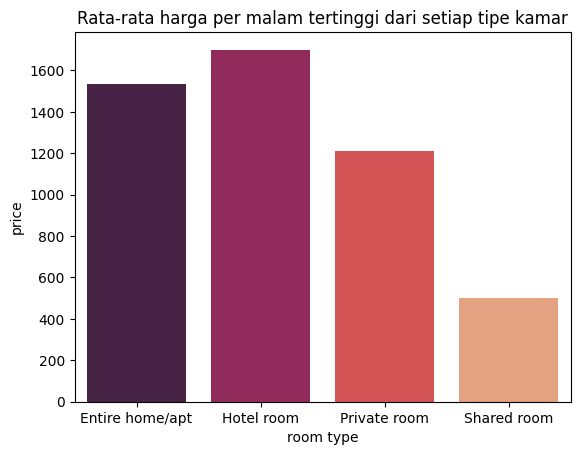

In [6268]:
# Data Visualization
sns.barplot(data=room_type_med_price, x = 'room_type', y = 'med_price',ci=0,palette='rocket')
plt.title("Rata-rata harga per malam tertinggi dari setiap tipe kamar")
plt.xlabel("room type")
plt.ylabel("price")
plt.show()

Hotel room memiliki median harga yang paling tinggi. Hal ini dapat disebabkan oleh faktor-faktor seperti fasilitas dan layanan yang disediakan oleh hote yang beragam, lokasi yang strategis, atau reputasi hotel yang terkenal di daerah tersebut.

Entire home/apartment memiliki median harga yang lebih tinggi daripada private room. Tipe ruangan ini menawarkan pengguna Airbnb keseluruhan rumah atau apartemen untuk digunakan secara eksklusif. Median harga untuk entire home/apartment cenderung lebih tinggi daripada private room, karena pengguna mendapatkan privasi dan ruang yang lebih besar.

Tipe ruangan private room menawarkan pengguna Airbnb kamar pribadi dalam rumah atau apartemen yang ditempati oleh host atau penghuni lain. Median harga untuk private room cenderung lebih rendah daripada entire home/apartment, karena pengguna harus berbagi fasilitas dengan host atau penghuni lainnya.

Tipe ruangan share room menawarkan pengguna Airbnb tempat tidur bersama dengan pengguna lain dalam kamar yang sama. Median harga untuk share room adalah yang terendah di antara jenis kamar lainnya, karena pengguna harus berbagi kamar dengan orang lain.

Hipotesa : 
- Ho : Data kolom dari `minimum_nights` dan `price` terdistribusi normal
- Ha : Data kolom dari `minimum_nights` dan `price` terdistribusi tidak normal

In [6269]:
from scipy.stats import normaltest
stats, pval=normaltest(dfa['price'])
if pval<=0.05:
    print('tidak normal') #Ha
else:
    print('distribusi normal') #Ho

tidak normal


<Figure size 800x600 with 0 Axes>

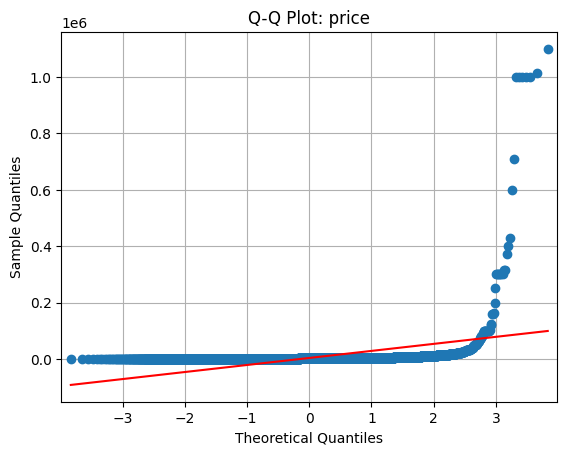

In [6270]:
import statsmodels.api as sm
# Membuat Q-Q plot berdasarkan Price
plt.figure(figsize=(8, 6))
sm.qqplot(dfa['price'], line='s')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot: price')
plt.grid(True)
plt.show()

In [6271]:
from scipy.stats import normaltest
stats, pval=normaltest(dfa['minimum_nights'])
if pval<=0.05:
    print('tidak normal') #Ha
else:
    print('distribusi normal') #Ho

tidak normal


<Figure size 800x600 with 0 Axes>

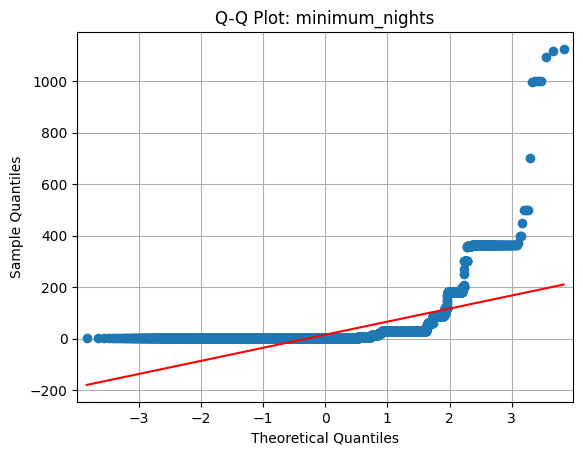

In [6272]:
# Membuat Q-Q Plot: minimum_nights
plt.figure(figsize=(8, 6))
sm.qqplot(dfa['minimum_nights'], line='s')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot: minimum_nights')
plt.grid(True)
plt.show()

## Berdasarkan `name`  

kedua, saya melihat bagaimana pengaruh nama penginapan dengan harga maupun review per bulan. Kita akan menganalisis kolom `name`, `price`,`reviews_per_month` untuk menjawab beberapa pertanyaan. untuk visualisasi yang lengkap, saya menggunakan tableau dengan link:

In [6273]:
dfb = df[['listing_name', 'price']]
dfb.head()

,listing_name,price
0,Nice room with superb city view,1905
1,"Easy going landlord,easy place",1316
2,modern-style apartment in Bangkok,800
3,Spacious one bedroom at The Kris Condo Bldg. 3,1286
4,Suite Room 3 at MetroPoint,1905


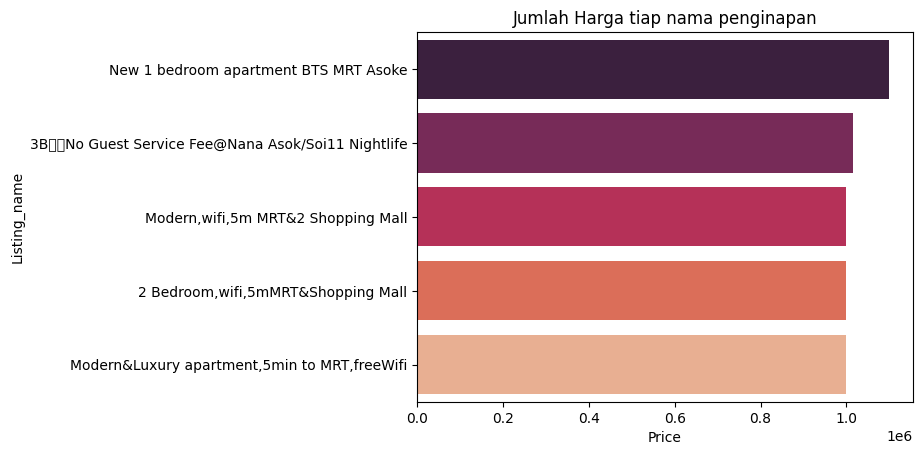

In [6274]:
# Data Visualization
dfb_sort1 = dfb.nlargest(5, 'price')
sns.barplot(data = dfb_sort1, x = 'price', y = 'listing_name',palette='rocket')
plt.title("Jumlah Harga tiap nama penginapan")
plt.xlabel("Price")
plt.ylabel("Listing_name")
plt.show()

##Berdasarkan `availability`  

ketiga, saya melihat bagaimana pengaruh `availability` dengan `number_of_reviews`. Analis akan menganalisis dengan menampilkan pie chart dengan asumsi number of review adalah jumlah costumer yang menginap dan memberi penilaian. untuk visualisasi yang lengkap, analis menggunakan tableau dengan link: https://public.tableau.com/views/Capstone2_16984222628860/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

In [6275]:
dfc = df[['room_type', 'price','number_of_reviews', 'availability_365']]
dfc.head()

,room_type,price,number_of_reviews,availability_365
0,Entire home/apt,1905,65,Yes
1,Private room,1316,0,Yes
2,Private room,800,0,No
3,Private room,1286,2,Yes
4,Private room,1905,0,No


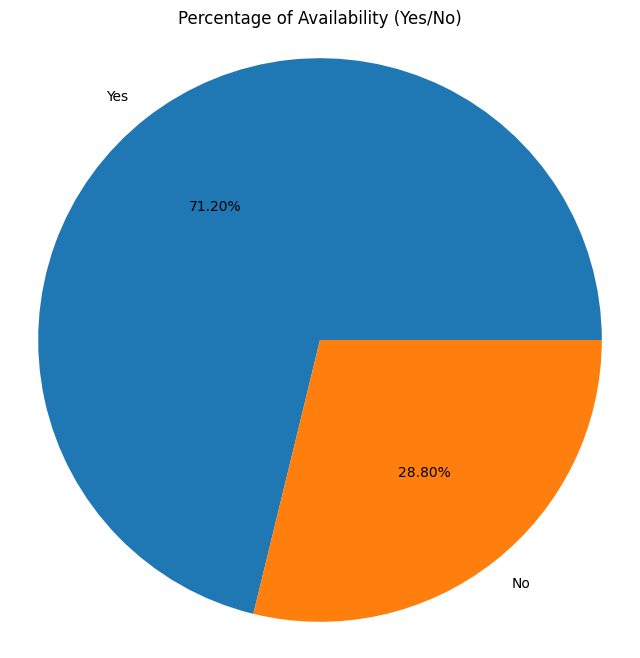

In [6276]:
availability_count = dfc['availability_365'].value_counts()
# Calculate the percentage of 'Yes' and 'No'
total = availability_count.sum()
percentage_yes = (availability_count['Yes'] / total) * 100
percentage_no = (availability_count['No'] / total) * 100

# Create the pie chart
labels = ['Yes', 'No']
percentages = [percentage_yes, percentage_no]
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=labels, autopct='%.2f%%')
plt.title('Percentage of Availability (Yes/No)')
plt.axis('equal')
plt.show()

In [6277]:
from scipy.stats import normaltest
stats, pval=normaltest(dfc['number_of_reviews'])
if pval<=0.05:
    print('tidak normal') #Ha
else:
    print('distribusi normal') #Ho

tidak normal


In [6278]:
dfc['availability'] = dfc['availability_365'].map({'Yes': 1, 'No': 0}).astype(int)
dfc.head()

,room_type,price,number_of_reviews,availability_365,availability
0,Entire home/apt,1905,65,Yes,1
1,Private room,1316,0,Yes,1
2,Private room,800,0,No,0
3,Private room,1286,2,Yes,1
4,Private room,1905,0,No,0


In [6279]:
from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[dfc[dfc['availability']==i]['number_of_reviews'] for i in dfc['availability'].unique()], alternative='less')
if pval <= 0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Gagal menolak Ho


sesuai dengan data yang kita punya dan berdasarkan performa dari Mann-Whitney U test dan tidak punya cukup bukti untuk membuktikan bahwa ada perbedaan signifikan antara `availability_365` dan `number_of_reviews`.

In [6280]:
from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[dfc[dfc['availability']==i]['price'] for i in dfc['availability'].unique()], alternative='less')
if pval <= 0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


sesuai dengan data yang kita punya dan berdasarkan performa dari Mann-Whitney U test, kita punya cukup bukti untuk membuktikan bahwa ada perbedaan signifikan antara `availability_365` dan `price`.



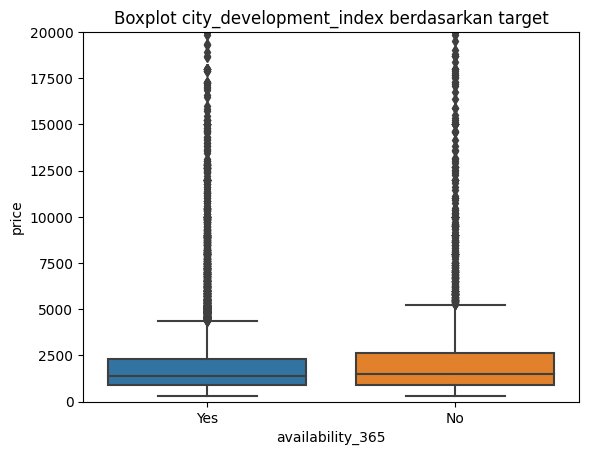

In [6281]:
sns.boxplot(y='price', x='availability_365', data=dfc)
plt.title('Boxplot city_development_index berdasarkan target')
y_min = 0
y_max = 20000
plt.ylim(y_min, y_max)
plt.show()

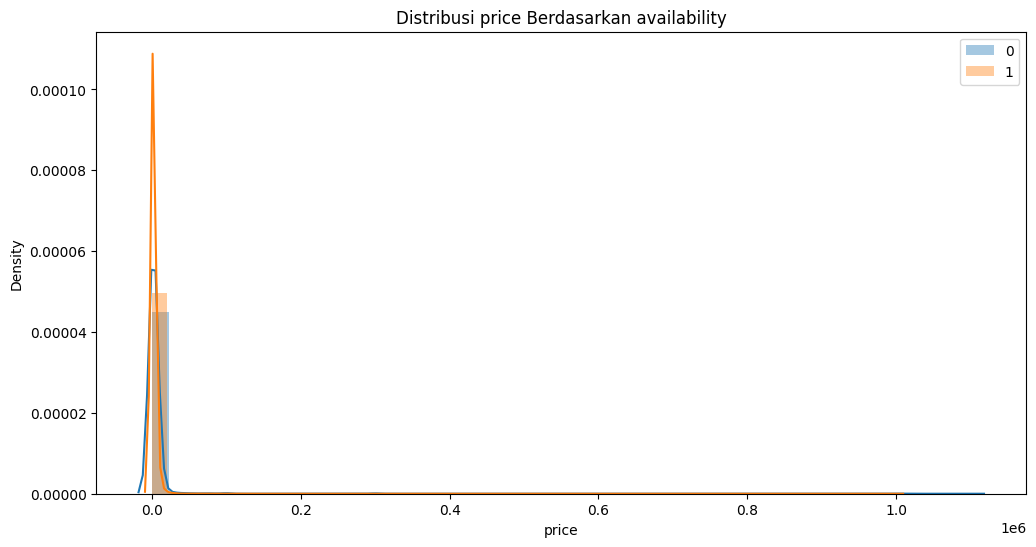

In [6282]:
plt.figure(figsize=(12,6))
sns.distplot(dfc[dfc['availability']==0]['price'],label=0)
sns.distplot(dfc[dfc['availability']==1]['price'],label=1)
plt.title('Distribusi price Berdasarkan availability')
plt.legend()
plt.show()

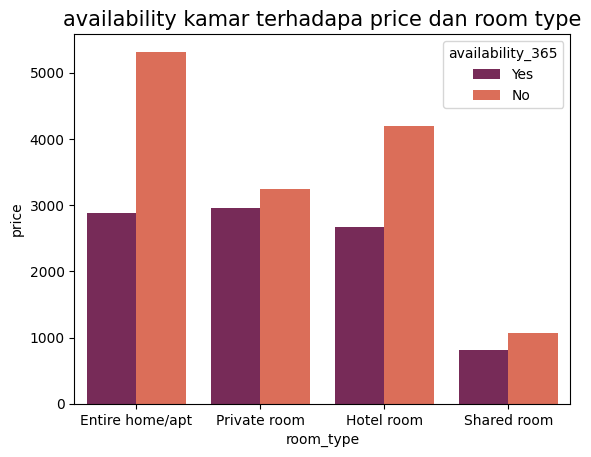

In [6283]:
# Data Visualization
sns.barplot(data = dfc, x = 'room_type', y = 'price', hue = 'availability_365',ci=0,palette='rocket')
plt.title("availability kamar terhadapa price dan room type", size = 15)
plt.xlabel("room_type")
plt.ylabel("price")
plt.show()

# Kesimpulan dan Rekomendasi





**Kesimpulan**

1. Neighbourhood 


**Rekomendasi**

1. 